In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-users-dataset/telecom_users.csv


#### Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

#### Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

#### You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

#### The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

#### Description of the data (with the calculation of basic statistics);
#### Research of dependencies and formulation of hypotheses;
#### Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
#### Comparison of the quality of the obtained models.

About this file

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve
import scipy.stats as stats
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/telecom-users-dataset/telecom_users.csv')

In [4]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [5]:
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

#### There are 2 variable which is useless for our model..[Unnamed: 0', 'customerID'],so we drop it.

In [6]:
data.drop(columns=['Unnamed: 0','customerID'],inplace=True)

## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


#### we see that variable TotalCharges is object type but it should be float type,so lets convert it.

In [8]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [9]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)# missing value treated

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2296.580647
std,0.367909,24.516391,30.114702,2272.514574
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,406.275000
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data.describe(include=[np.object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [13]:
cat_var=data.select_dtypes(include=object).columns.to_list()
num_var=data.select_dtypes(include=np.number).columns.to_list()

In [14]:
data1=data.copy()

### UNIVARIATE ANALYSIS

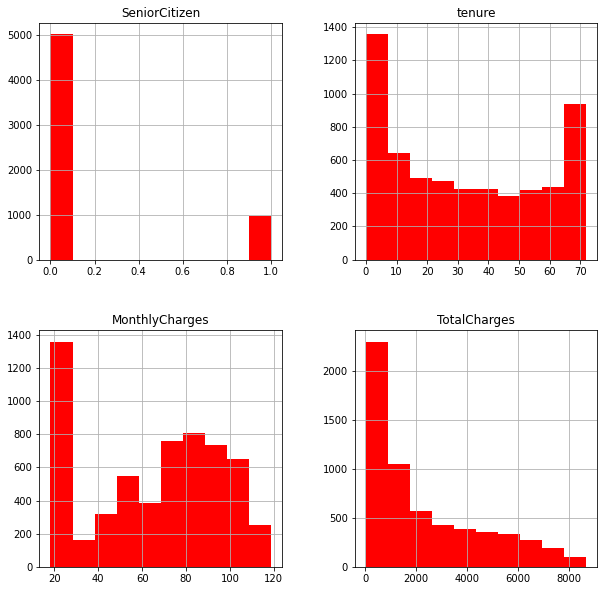

In [15]:
data1.hist(figsize=(10,10),color='red')
plt.show()

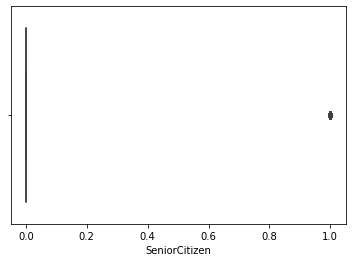

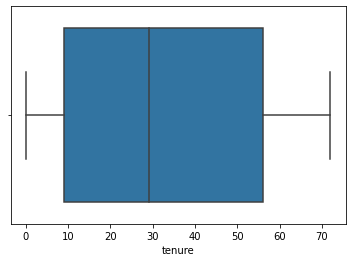

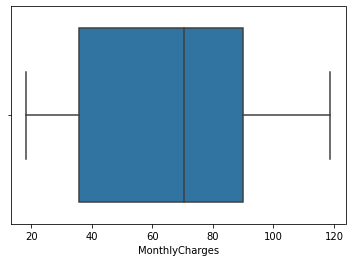

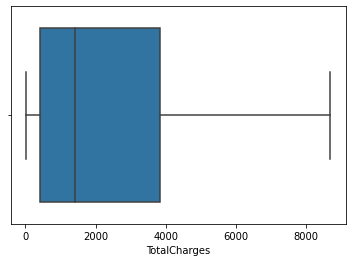

In [16]:
for i in num_var:
    sns.boxplot(data=data,x=i)
    plt.show()

#### Here we can see that we did'nt get any outlier

### BIVARIATE ANALYSIS

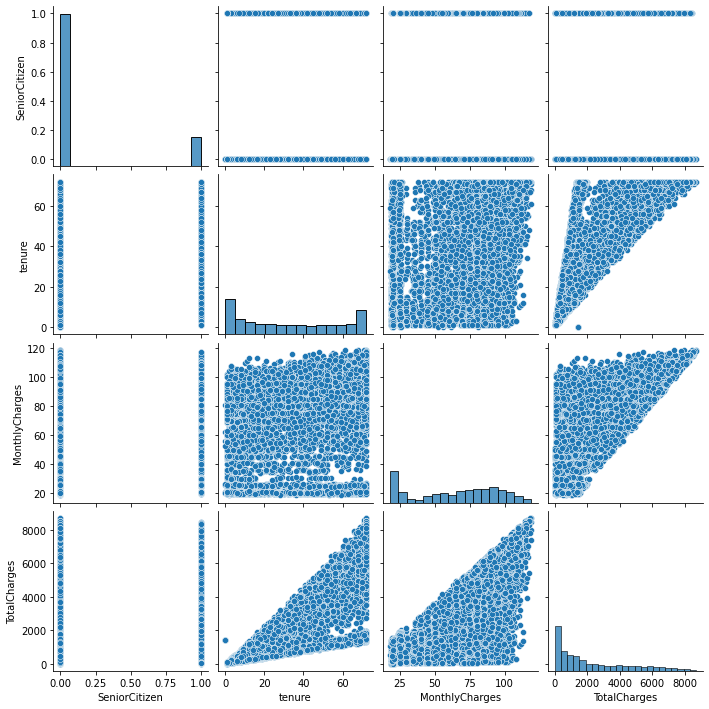

In [17]:
sns.pairplot(data)

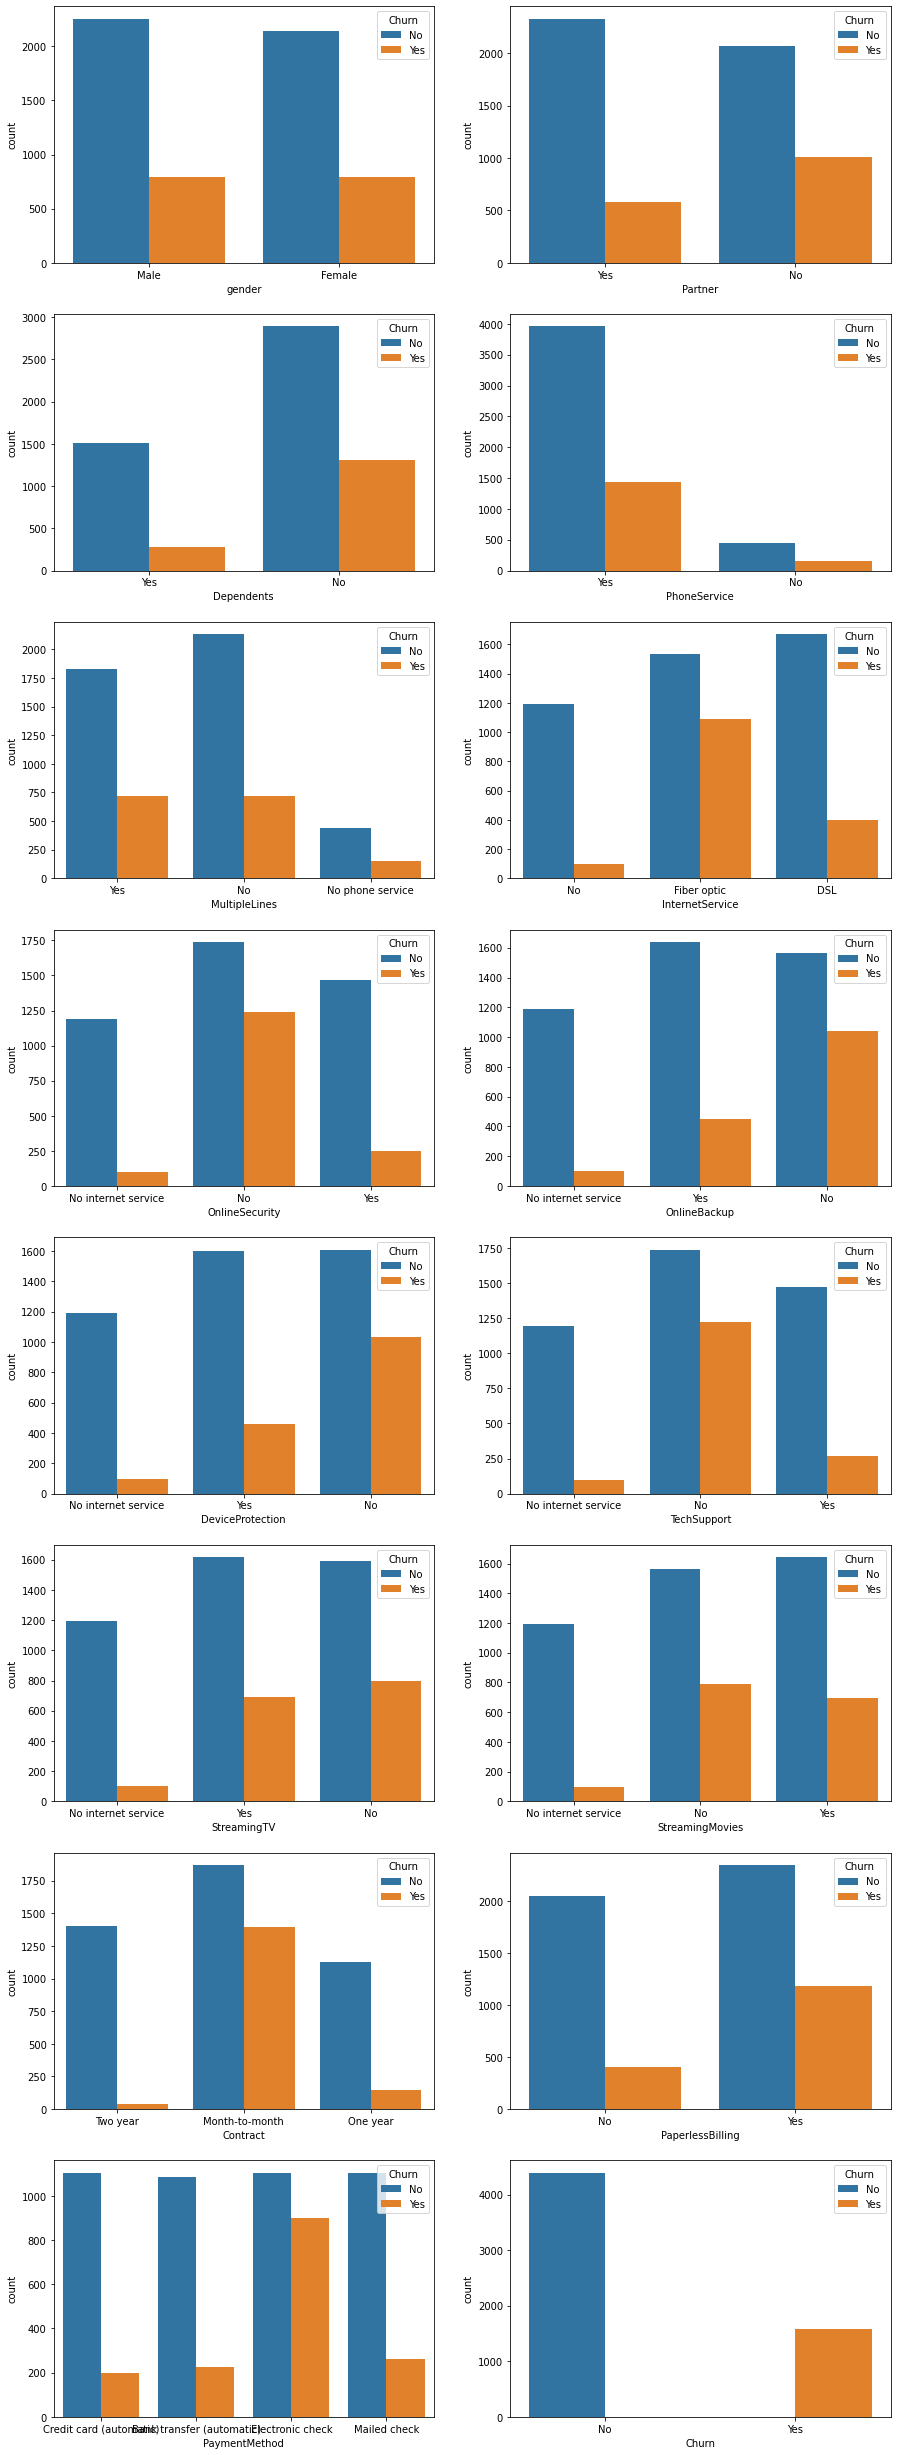

In [18]:
i=1
plt.figure(figsize=(15,50))
for col in cat_var:
    plt.subplot(9,2,i)
    sns.countplot(data=data1, x=col,hue='Churn')
    i+=1

#### By observing above plot carefully ,we reach upto certain conclusion that there are some categories of variable where the customer has more probability to leave the services.
#### So ,to retain them in  telecom services company will have to primarily focus on those factors.
#### Here is the list of those key factor where there is more probability of customer getting churn,
#### Organisation has to improve those field of services

#### 1- Parner-No
#### 2- Dependent-NO
#### 3- Phone Services-Yes
#### 4- Multiple lines-Yes
#### 5- Internet Service- Fibre optics
#### 6- Online security -NO
#### 7- Online Backup-NO
#### 8- Device Protection-No
#### 9- Tech Support -No
#### 10- Streaming TV- NO
#### 11- Streaming Movies no
#### 12- Contract-month to month
#### 13- Paperless billing -YES
#### 14- Payment Method - Electronic check

#### So all above are the key area where services will have to be the best , otherwise customer will more tendency to churn.
#### Telecom company has to focus on more to retain old customer rather than to find new customers only.

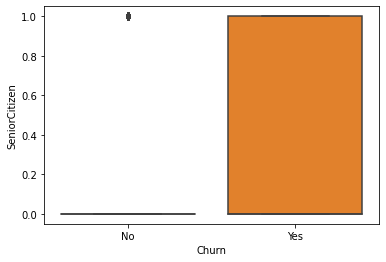

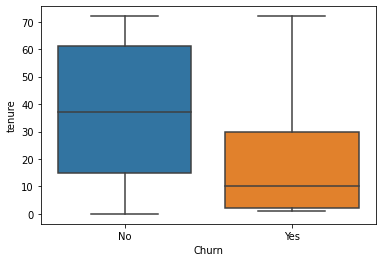

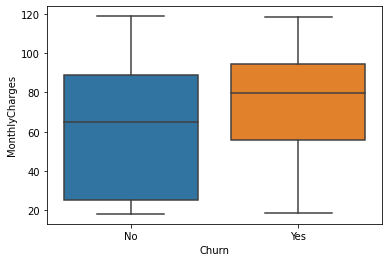

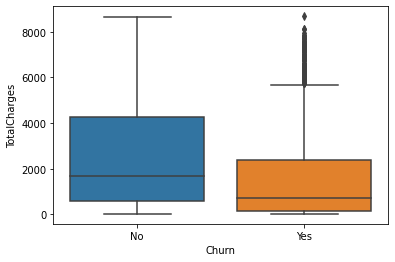

In [19]:
for i in num_var:
    sns.boxplot(data=data,y=i,x='Churn')
    plt.show()

#### The customers whose tenure is less, monthly charge is high , total charge is less are more probable to leave the services.

In [20]:
lb=LabelEncoder()

In [21]:
for i in cat_var:
    data1[i]=lb.fit_transform(data[i])

In [22]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


<AxesSubplot:>

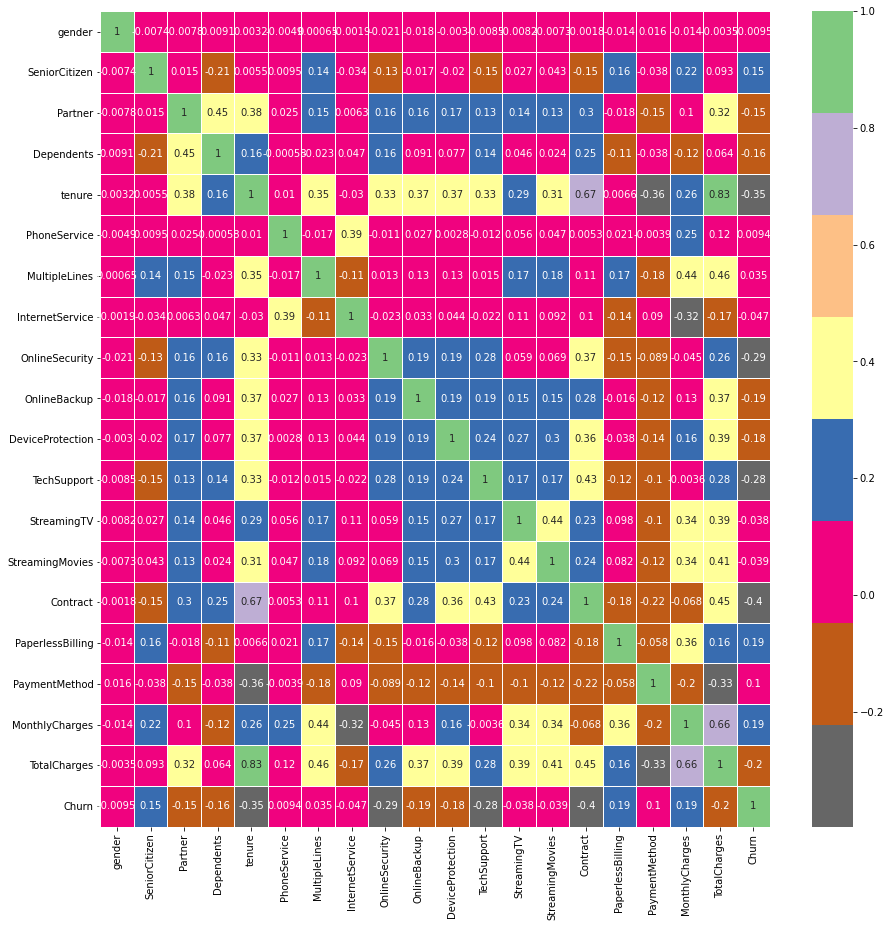

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),linewidths=1,cmap='Accent_r',annot=True)

<AxesSubplot:>

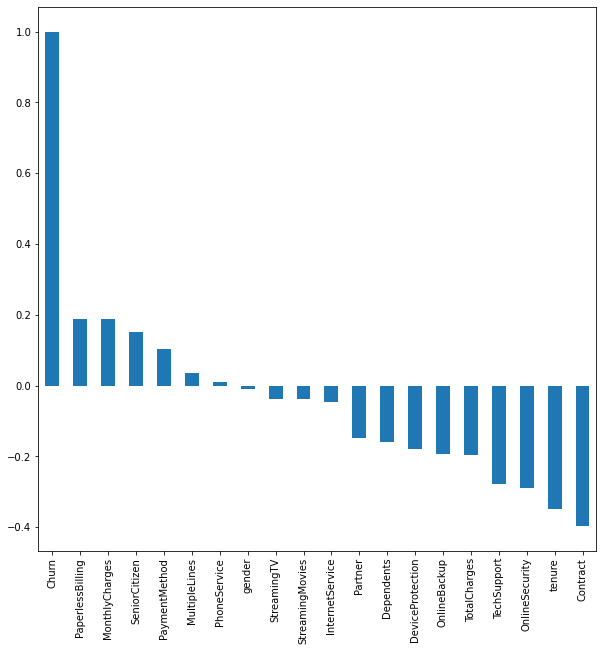

In [24]:
plt.figure(figsize=(10,10))
corr=data1.corr()['Churn'].sort_values(ascending=False)
corr.plot(kind='bar')

In [25]:
data2=data.copy()

### FEATURE ENGINEERING

In [26]:
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [27]:
data2=pd.get_dummies(data2,drop_first=True)

In [28]:
sc=StandardScaler()

In [29]:
scaled=sc.fit_transform(data2[['tenure','MonthlyCharges','TotalCharges']])
scaled=pd.DataFrame(scaled,columns=['tenure','MonthlyCharges','TotalCharges'])

In [30]:
scaled_data=pd.concat([scaled,data2.drop(columns=['tenure','MonthlyCharges','TotalCharges'])],axis=1)

In [31]:
scaled_data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.612576,-1.351686,-0.247293,0,1,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0.470387,0.775360,0.737843,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0.225633,0.336999,0.252283,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,-1.161310,-0.295635,-0.905716,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,-1.242895,-0.376997,-0.958085,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,-1.283688,1.002843,-0.968867,0,1,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
5982,-0.386254,0.873327,-0.043251,0,0,1,1,1,0,1,...,1,0,1,0,1,1,1,0,0,0
5983,-0.834971,-1.449653,-0.875989,0,1,1,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
5984,-0.834971,1.150623,-0.482515,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1


In [32]:
X_scaled=scaled_data.drop(columns='Churn_Yes')
Y=scaled_data[['Churn_Yes']]

In [33]:
pca=PCA()

In [34]:
model=pca.fit_transform(X_scaled)
model

array([[-1.42211847e+00,  2.90855187e+00, -4.61996450e-01, ...,
        -9.27687485e-16,  1.34474823e-15,  9.17817759e-16],
       [ 1.37822362e+00, -1.68710700e-01, -1.19127348e-01, ...,
        -1.49291247e-15, -4.68187597e-16,  3.05618975e-15],
       [ 5.79377875e-01, -3.35229906e-01, -5.75756599e-01, ...,
         3.09833162e-16,  5.25480125e-16, -3.62305290e-17],
       ...,
       [-2.69001470e+00,  6.01793434e-01, -6.69338241e-01, ...,
        -3.17732471e-17, -3.32346588e-17,  1.02970836e-17],
       [ 7.32846610e-01, -1.80418125e+00, -1.03211558e+00, ...,
         1.78237980e-16,  5.45284676e-17,  1.01607709e-17],
       [-2.62066231e+00,  1.15101121e+00, -3.33539033e-01, ...,
         8.52265437e-18,  8.36849133e-17,  2.00217293e-17]])

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39348612, 0.57900017, 0.640068  , 0.67503069, 0.70783972,
       0.73840428, 0.76669083, 0.79290965, 0.81805637, 0.84110533,
       0.86019709, 0.87917796, 0.89683405, 0.91357888, 0.92955009,
       0.94496375, 0.9583842 , 0.97025461, 0.98069739, 0.98833971,
       0.99472715, 0.99994111, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [36]:
feature=range(pca.n_components_)

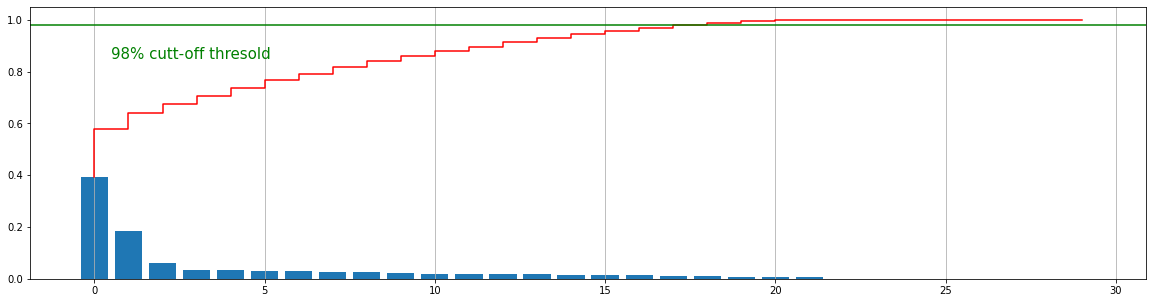

In [37]:
plt.figure(figsize=(20,5))
plt.bar(feature,pca.explained_variance_ratio_)
plt.step(feature,np.cumsum(pca.explained_variance_ratio_),color='red')
plt.axhline(y=.98,color='green')
plt.grid(axis='x')
plt.text(0.5,.85,'98% cutt-off thresold',color='green',fontsize=15)
plt.show()

#### upto 19 PCA component 98% variance of the data has been covered,so we will take n_component=19

In [38]:
pca1=PCA(n_components=19,whiten=True)

In [39]:
model1=pca1.fit_transform(X_scaled)

In [40]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.39348612, 0.57900017, 0.640068  , 0.67503069, 0.70783972,
       0.73840428, 0.76669083, 0.79290965, 0.81805637, 0.84110533,
       0.86019709, 0.87917796, 0.89683405, 0.91357888, 0.92955009,
       0.94496375, 0.9583842 , 0.97025461, 0.98069739])

### Model Selection

#### Before going into the Modelling ,it should be noted that our data is highly sensitive to False Negative.
#### Let suppose a customer has high probability to leave the sevice(churn) ,but if our model predict that he is not going to leave (not churn) which is False Negative, then company will not be  primarily focusing to that customer's services and then customer will definatly leave the sevices(churn) which results in loss to the company.
#### And if customer is not willing to leave the services and is satisfied, but our model tells that he is going to leave the services then company will provide him extra benefits ,offers and then customer will become extra happy. Thats why we will not focus on getting best accuracy but try to get best Recall Score.

In [41]:
x_train,x_test,y_train,y_test=train_test_split(model1,Y,test_size=.3,random_state=0)

In [42]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
adb=AdaBoostClassifier()
sgd=SGDClassifier()
svc=SVC()
mlpc=MLPClassifier()

In [43]:
algo=[lg,dt,rf,nb,knn,adb,sgd,svc,mlpc]

In [44]:
model=[]
acc=[]
recall=[]
for i in algo:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    model.append(i)
    acc.append(i.score(x_test,y_test))
    recall.append(recall_score(y_pred,y_test))

In [45]:
table=pd.DataFrame([model,acc,recall]).T
table.columns=['model','accuracy','recall']

In [46]:
table

,model,accuracy,recall
0,LogisticRegression(),0.808463,0.681941
1,DecisionTreeClassifier(),0.719376,0.474333
2,"(DecisionTreeClassifier(max_features='auto', r...",0.790089,0.655488
3,GaussianNB(),0.791203,0.598113
4,KNeighborsClassifier(),0.757238,0.547046
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.806236,0.669251
6,SGDClassifier(),0.782294,0.72
7,SVC(),0.802895,0.688822
8,MLPClassifier(),0.783964,0.615776


#### We can see that logistic regression and SVC has the same accuracy and recall score. we choose SVC  for final model model building

In [47]:
svc1=SVC(probability=True)
svc1.fit(x_train,y_train)

SVC(probability=True)

In [48]:
svc1.score(x_test,y_test)

0.8028953229398663

In [49]:
y_pred=svc1.predict(x_test)

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1465
           1       0.48      0.69      0.56       331

    accuracy                           0.80      1796
   macro avg       0.70      0.76      0.72      1796
weighted avg       0.84      0.80      0.82      1796



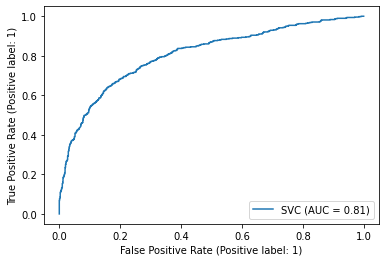

In [51]:
plot_roc_curve(svc1,x_test,y_test)

In [52]:
roc_auc_score(y_test,y_pred)

0.6988918003370094

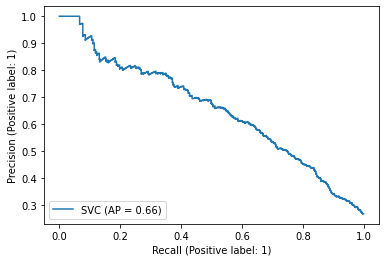

In [53]:
plot_precision_recall_curve(svc1,x_test,y_test)

#### We know that in any binary classification model, the cuttoff point for probability is by default =0.5.
#### So we choose the cuttoff point to reduce the accuracy to 75%. so that recall can increase.

In [54]:
y_pred_prob=svc1.predict_proba(x_test)[:,1]

In [55]:
FPR,TPR,THRESOLD=roc_curve(y_test,y_pred_prob)

In [56]:
for i in THRESOLD:
    y_test_pred=np.where(y_pred_prob>i,1,0)
    acc=accuracy_score(y_test,y_test_pred)
    print(acc,i)

0.7332962138084632 1.930420249557542
0.7332962138084632 0.930420249557542
0.7505567928730512 0.8666414348914867
0.7511135857461024 0.8663085091678091
0.7527839643652561 0.8530003028533343
0.7527839643652561 0.850301442568213
0.7538975501113586 0.8417193639103868
0.7544543429844098 0.8411403369932694
0.7589086859688196 0.8326270763415344
0.7594654788418709 0.8319283950678412
0.7594654788418709 0.8279431206542932
0.7600222717149221 0.8262995158500265
0.7600222717149221 0.8223760998219447
0.7600222717149221 0.8210875339291348
0.7600222717149221 0.817040728942776
0.7605790645879733 0.8170348552433161
0.7605790645879733 0.8161466423767009
0.7611358574610245 0.8097325019168254
0.762249443207127 0.808480219549454
0.762249443207127 0.8061700961658075
0.7616926503340757 0.8060546134877351
0.762249443207127 0.8048679983003107
0.7661469933184856 0.798511395013268
0.7667037861915368 0.7981996729407522
0.7661469933184856 0.7980781815198693
0.7667037861915368 0.7962073884925411
0.767260579064588 0.7

#### From above we can see that at cuttoff point 0.17 we get accuracy upto 70%

In [57]:
for i in THRESOLD:
    y_test_pred=np.where(y_pred_prob>i,1,0)
    recall=recall_score(y_test,y_test_pred)
    print(recall,i)

0.0 1.930420249557542
0.0 0.930420249557542
0.06471816283924843 0.8666414348914867
0.06680584551148225 0.8663085091678091
0.07515657620041753 0.8530003028533343
0.07724425887265135 0.850301442568213
0.08350730688935282 0.8417193639103868
0.08559498956158663 0.8411403369932694
0.10438413361169102 0.8326270763415344
0.10647181628392484 0.8319283950678412
0.10855949895615867 0.8279431206542932
0.11064718162839249 0.8262995158500265
0.1127348643006263 0.8223760998219447
0.11482254697286012 0.8210875339291348
0.11691022964509394 0.817040728942776
0.11899791231732777 0.8170348552433161
0.12108559498956159 0.8161466423767009
0.12317327766179541 0.8097325019168254
0.12943632567849686 0.808480219549454
0.1315240083507307 0.8061700961658075
0.1315240083507307 0.8060546134877351
0.1336116910229645 0.8048679983003107
0.15031315240083507 0.798511395013268
0.1524008350730689 0.7981996729407522
0.1524008350730689 0.7980781815198693
0.1544885177453027 0.7962073884925411
0.15866388308977036 0.795495555

In [58]:
y_test_pred=np.where(y_pred_prob>=0.17,1,0)

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1317
           1       0.47      0.79      0.59       479

    accuracy                           0.71      1796
   macro avg       0.68      0.73      0.68      1796
weighted avg       0.78      0.71      0.72      1796



#### so our recall score has been increased